Import seaborn which is the Visualztion tool being used for this Vis. Improt pandas which is used for loading the dataset. Both are very improtant when creating a Vis with I add plotly as a sub tool but the main tool is seaborn.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px

Next we are going to mount our google drive since we are using google colab. This is to have access to files stored there. Have the Dataset you're using be saved in your google drive. This is what we are going to mount and read in to get our data set.
```/content/drive/My Drive/insert_your_foldername/your_dataSet.csv```

Note: Ensure that the file is in the correct location within Google Drive before running this.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

# Loading dataset
df = pd.read_csv('/content/drive/My Drive/Top 500 Movies.csv') # Upload the CSV file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here is to make sure that worldwide gross and the year columns in our dataset are numeric data types. We have to convert them. We have **errors="coerce"** to make sure that invalid values get replaced with NaN. This is to prevent erroring when we visualized the scatter plot. Then we set the color palette of the Vis. U can change to fit what colors you want.

In [20]:
df.columns = df.columns.str.strip()

df = df.rename(columns={
    'title': 'title',
    'worldwide gross (m)': 'gross'
})

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df = df.dropna(subset=['title', 'year', 'gross', 'decade'])
palette = {
    "1970's": '#A9A9A9',
    "1980's": '#BDB76B',
    "1990's": '#20B2AA',
    "2000's": '#008B8B',
    "2010's": '#9370DB',
    "2020's": '#00CED1',
}

We can preview the dataset, *df.head()* previews the first five rows of our data set. This is to check if the data from the dataset properaly loads in.


You can remove this or comment it out if you feel you don't need it.

In [21]:
# Preview the data
df.head()

,title,gross,% budget recovered,X times budget recovered,budget (millions),domestic gross (m),domestic %,international gross (m),% of gross from international,worldwide gross,year,decade,source,budget source,force label,horror
0,300,456.0,702%,7.0,65.0,211.0,46.2%,245,53.8%,"456,082,343",2007,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
1,1917,385.0,427%,4.3,90.0,159.0,41.4%,225,58.6%,"384,576,334",2019,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://www.nytimes.com/2020/01/12/movies/1917...,NaN,not horror
2,2012,791.0,396%,4.0,200.0,166.0,21.0%,625,79.0%,"791,217,826",2009,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
3,101 Dalmatians,321.0,479%,4.8,67.0,136.0,42.5%,185,57.5%,"320,689,294",1996,1990's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://en.wikipedia.org/wiki/101_Dalmatians_(...,NaN,not horror
4,22 Jump Street,331.0,663%,6.6,50.0,192.0,57.9%,140,42.1%,"331,333,876",2014,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror


Here is where we start to create the scatter plot. Be very **careful** when puting in the names. The must match exactly as in the dataset.

x axis is the year, y axis is the gross in millions, color refers to the decades (the years differ by color), title refers to the title of the whole scatter plot (seen on the very top of chart), labels refer to the x/y axis label names. *hover_name* is the movie names.

Notice how there is no usage *hover_name*, *hover_name* is if you want a more interactive scatter plot, However, seaborn doesn't support interactive features, so it is opmitted.

To better visualize the scatter plot, I adjusted the points to 0.7. Makes it easy on the eyes. **You can adjust the transpaerency to your liking.**

For the scatter plot layout, legend_title_text, Labels the legend with decades.
tickmode & dtick, ensuring x-axis appears every 5 years.
tickprefix & ticksuffix, ensures y-axis values as millions.
plot_bgcolor, ensures a white background color.

**Note all of this changeable to your discretion.**

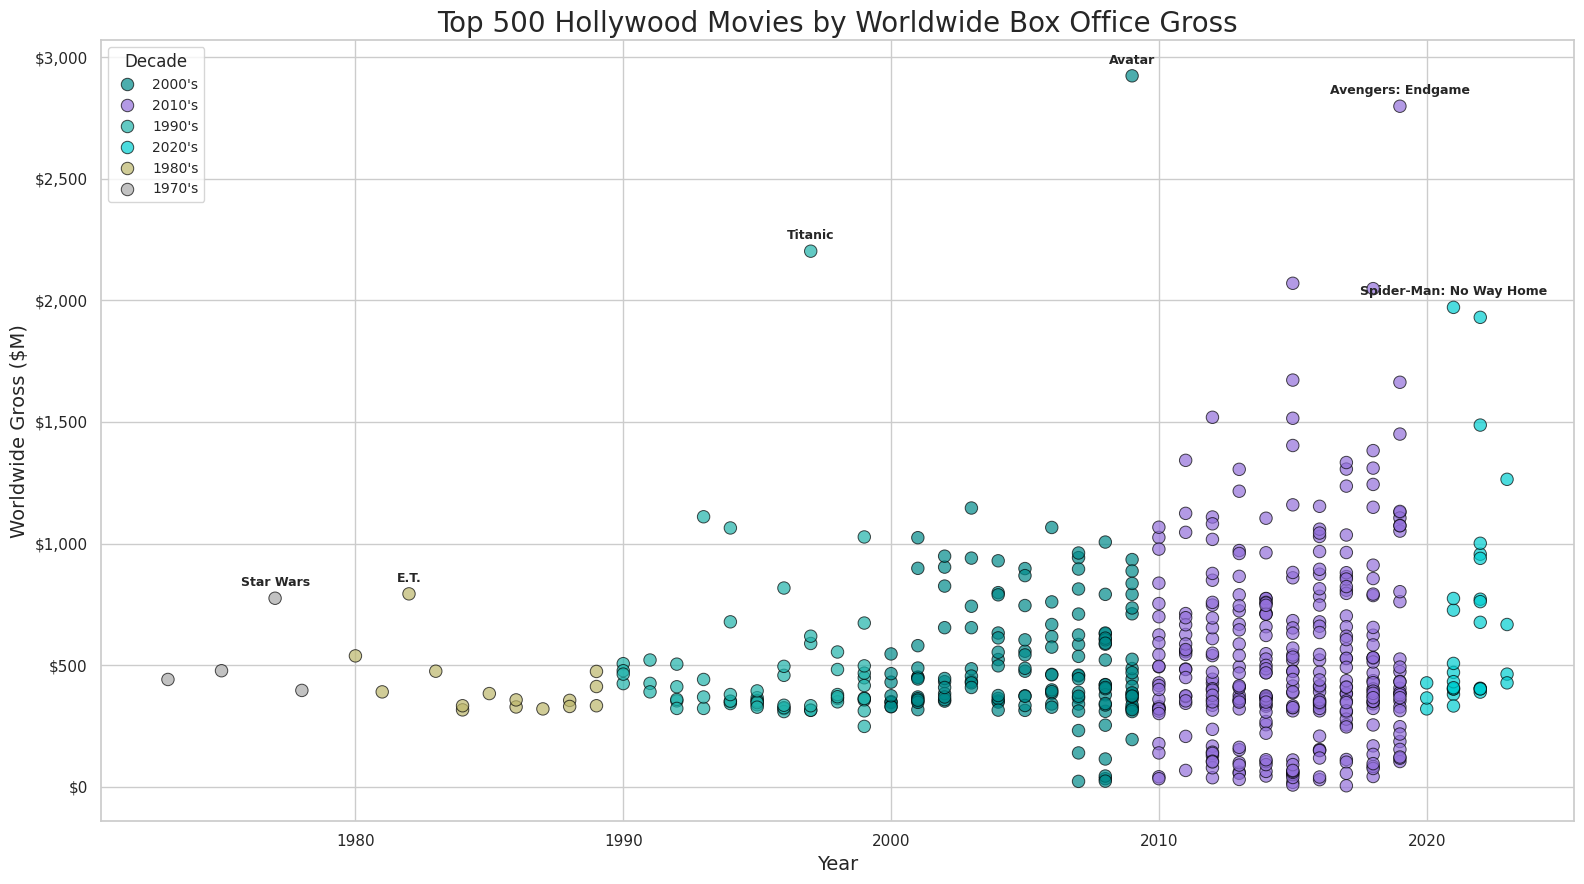

In [22]:
# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=df,
    x='year',
    y='gross',
    hue='decade',
    palette=palette,
    s=80,
    edgecolor='black',
    alpha=0.7
)

for decade in df['decade'].unique():
    top = df[df['decade'] == decade].sort_values(by='gross', ascending=False).head(1)
    for _, row in top.iterrows():
        plt.text(row['year'], row['gross'] + 50, row['title'],
                 fontsize=9, ha='center', weight='bold')

plt.title('Top 500 Hollywood Movies by Worldwide Box Office Gross', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Worldwide Gross ($M)', fontsize=14)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${int(x):,}')) # Now mticker is defined and can be used

plt.legend(title='Decade', title_fontsize=12, fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

**This** is what shows the final output!!